**Project-2 |** *APImon: Gotta fetch 'em all* - Enriching a dataset

**Libraries**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

**Dataset**

In [4]:
pokedex = pd.read_csv('./data/pokemon_all_clean.csv')
pokedex

#         Name  Weight (kg)  Height (m)    Type 1  Type 2  Total   HP  \
0      1    Bulbasaur          6.9         0.7     Grass  Poison    318   45   
1      2      Ivysaur         13.0         1.0     Grass  Poison    405   60   
2      3     Venusaur        100.0         2.0     Grass  Poison    525   80   
3      4   Charmander          8.5         0.6      Fire     NaN    309   39   
4      5   Charmeleon         19.0         1.1      Fire     NaN    405   58   
..   ...          ...          ...         ...       ...     ...    ...  ...   
883  901     Ursaluna        290.0         2.4    Ground  Normal    550  130   
884  902  Basculegion        110.0         3.0     Water   Ghost    530  120   
885  903     Sneasler         43.0         1.3  Fighting  Poison    510   80   
886  904     Overqwil         60.5         2.5      Dark  Poison    510   85   
887  905     Enamorus         48.0         1.6     Fairy  Flying    580   74   

     Attack  Defense  Sp. Atk  Sp. Def  Speed  Catch rate  Generation  \
0        49       49       65       65     45          45           1   
1        62       63       80       80     60          45           1   
2        82       83      100      100     80          45           1   
3        52       43       60       50     65          45           1   
4        64       58       80       65     80          45           1   
..      ...      ...      ...      ...    ...         ...         ...   
883     140      105       45       80     50          75           8   
884     112       65       80       75     78         135           8   
885     130       60       40       80    120         135           8   
886     115       95       65       65     85         135           8   
887     115       70      135       80    106           3           8   

     Legendary  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
883      False  
884      False  
885      False  
886      False  
887       True  

[888 rows x 16 columns]

**To visualize:**
- Relationship between Legendary, Total score and Catch rate
- Relationship between Pokémon Type and Stats
- Relationship between Weight, Height and Speed
- Distribution of Pokémon by Type
- Distribution of Pokémon (Legendary and not) by Generation

**Quiz based on first 150 Pokemon:**
- Which is the overall strongest Pokémon?
- Which are the heaviest and lighties, bigger and smaller Pokémon?
- Which is the fastest Pokémon?

<AxesSubplot:xlabel='Generation'>

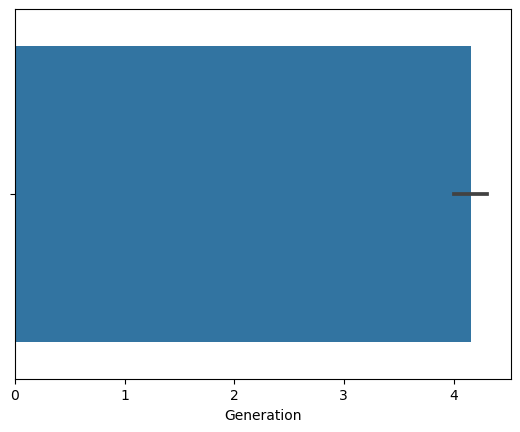

In [12]:
sns.barplot(x = "Generation", y =, data = pokedex)

<AxesSubplot:ylabel='Generation'>

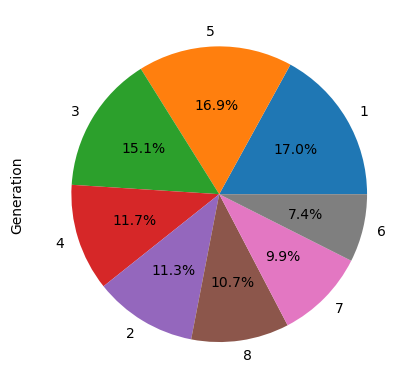

In [35]:
generation = pokedex["Generation"].value_counts()
generation.plot.pie(autopct="%.1f%%")

<AxesSubplot:xlabel='Total', ylabel='Catch rate'>

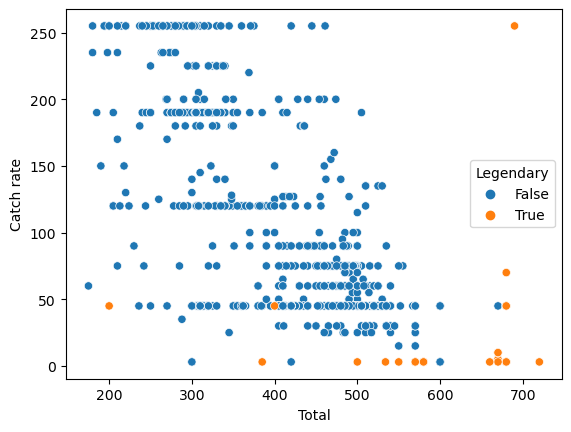

In [34]:
sns.scatterplot(x="Total", y="Catch rate", hue="Legendary",data=pokedex)

<AxesSubplot:xlabel='Weight (kg)', ylabel='Speed'>

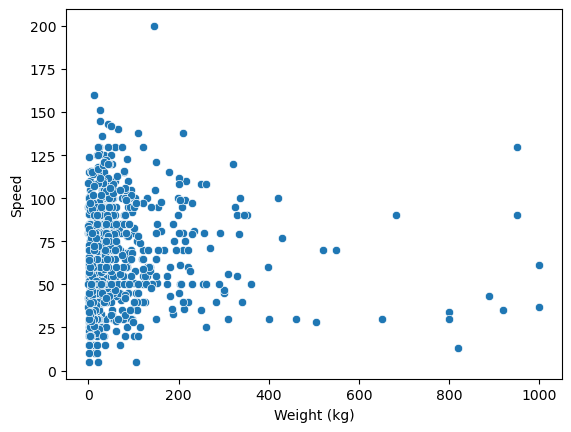

In [22]:
sns.scatterplot(x="Weight (kg)", y="Speed",data=pokedex)

<AxesSubplot:xlabel='Height (m)', ylabel='Speed'>

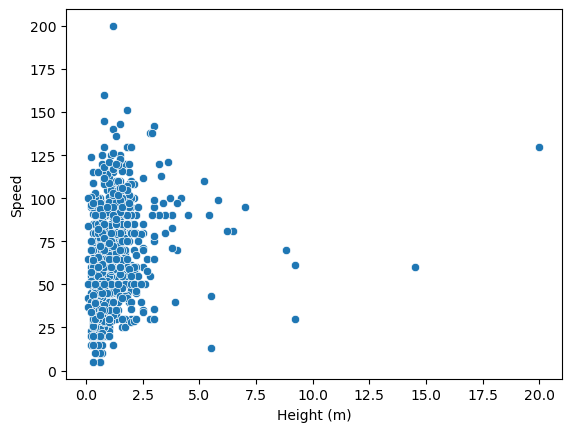

In [23]:
sns.scatterplot(x="Height (m)", y="Speed",data=pokedex)

<AxesSubplot:xlabel='count', ylabel='Type 1'>

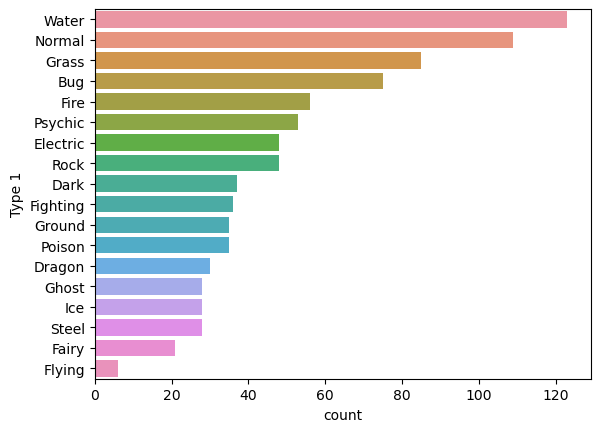

In [30]:
sns.countplot(y='Type 1', data=pokedex, order = pokedex['Type 1'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Type 2'>

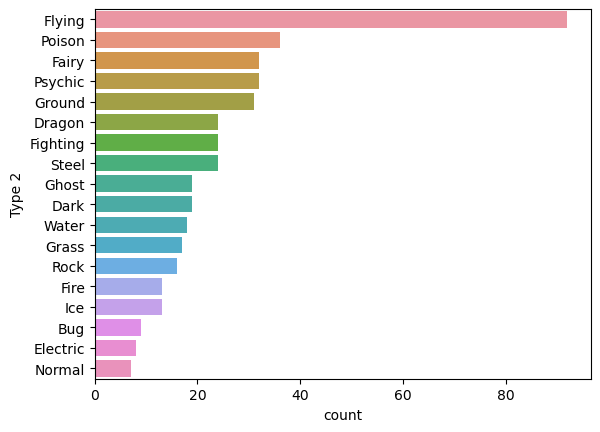

In [32]:
sns.countplot(y='Type 2', data=pokedex, order = pokedex['Type 2'].value_counts().index)

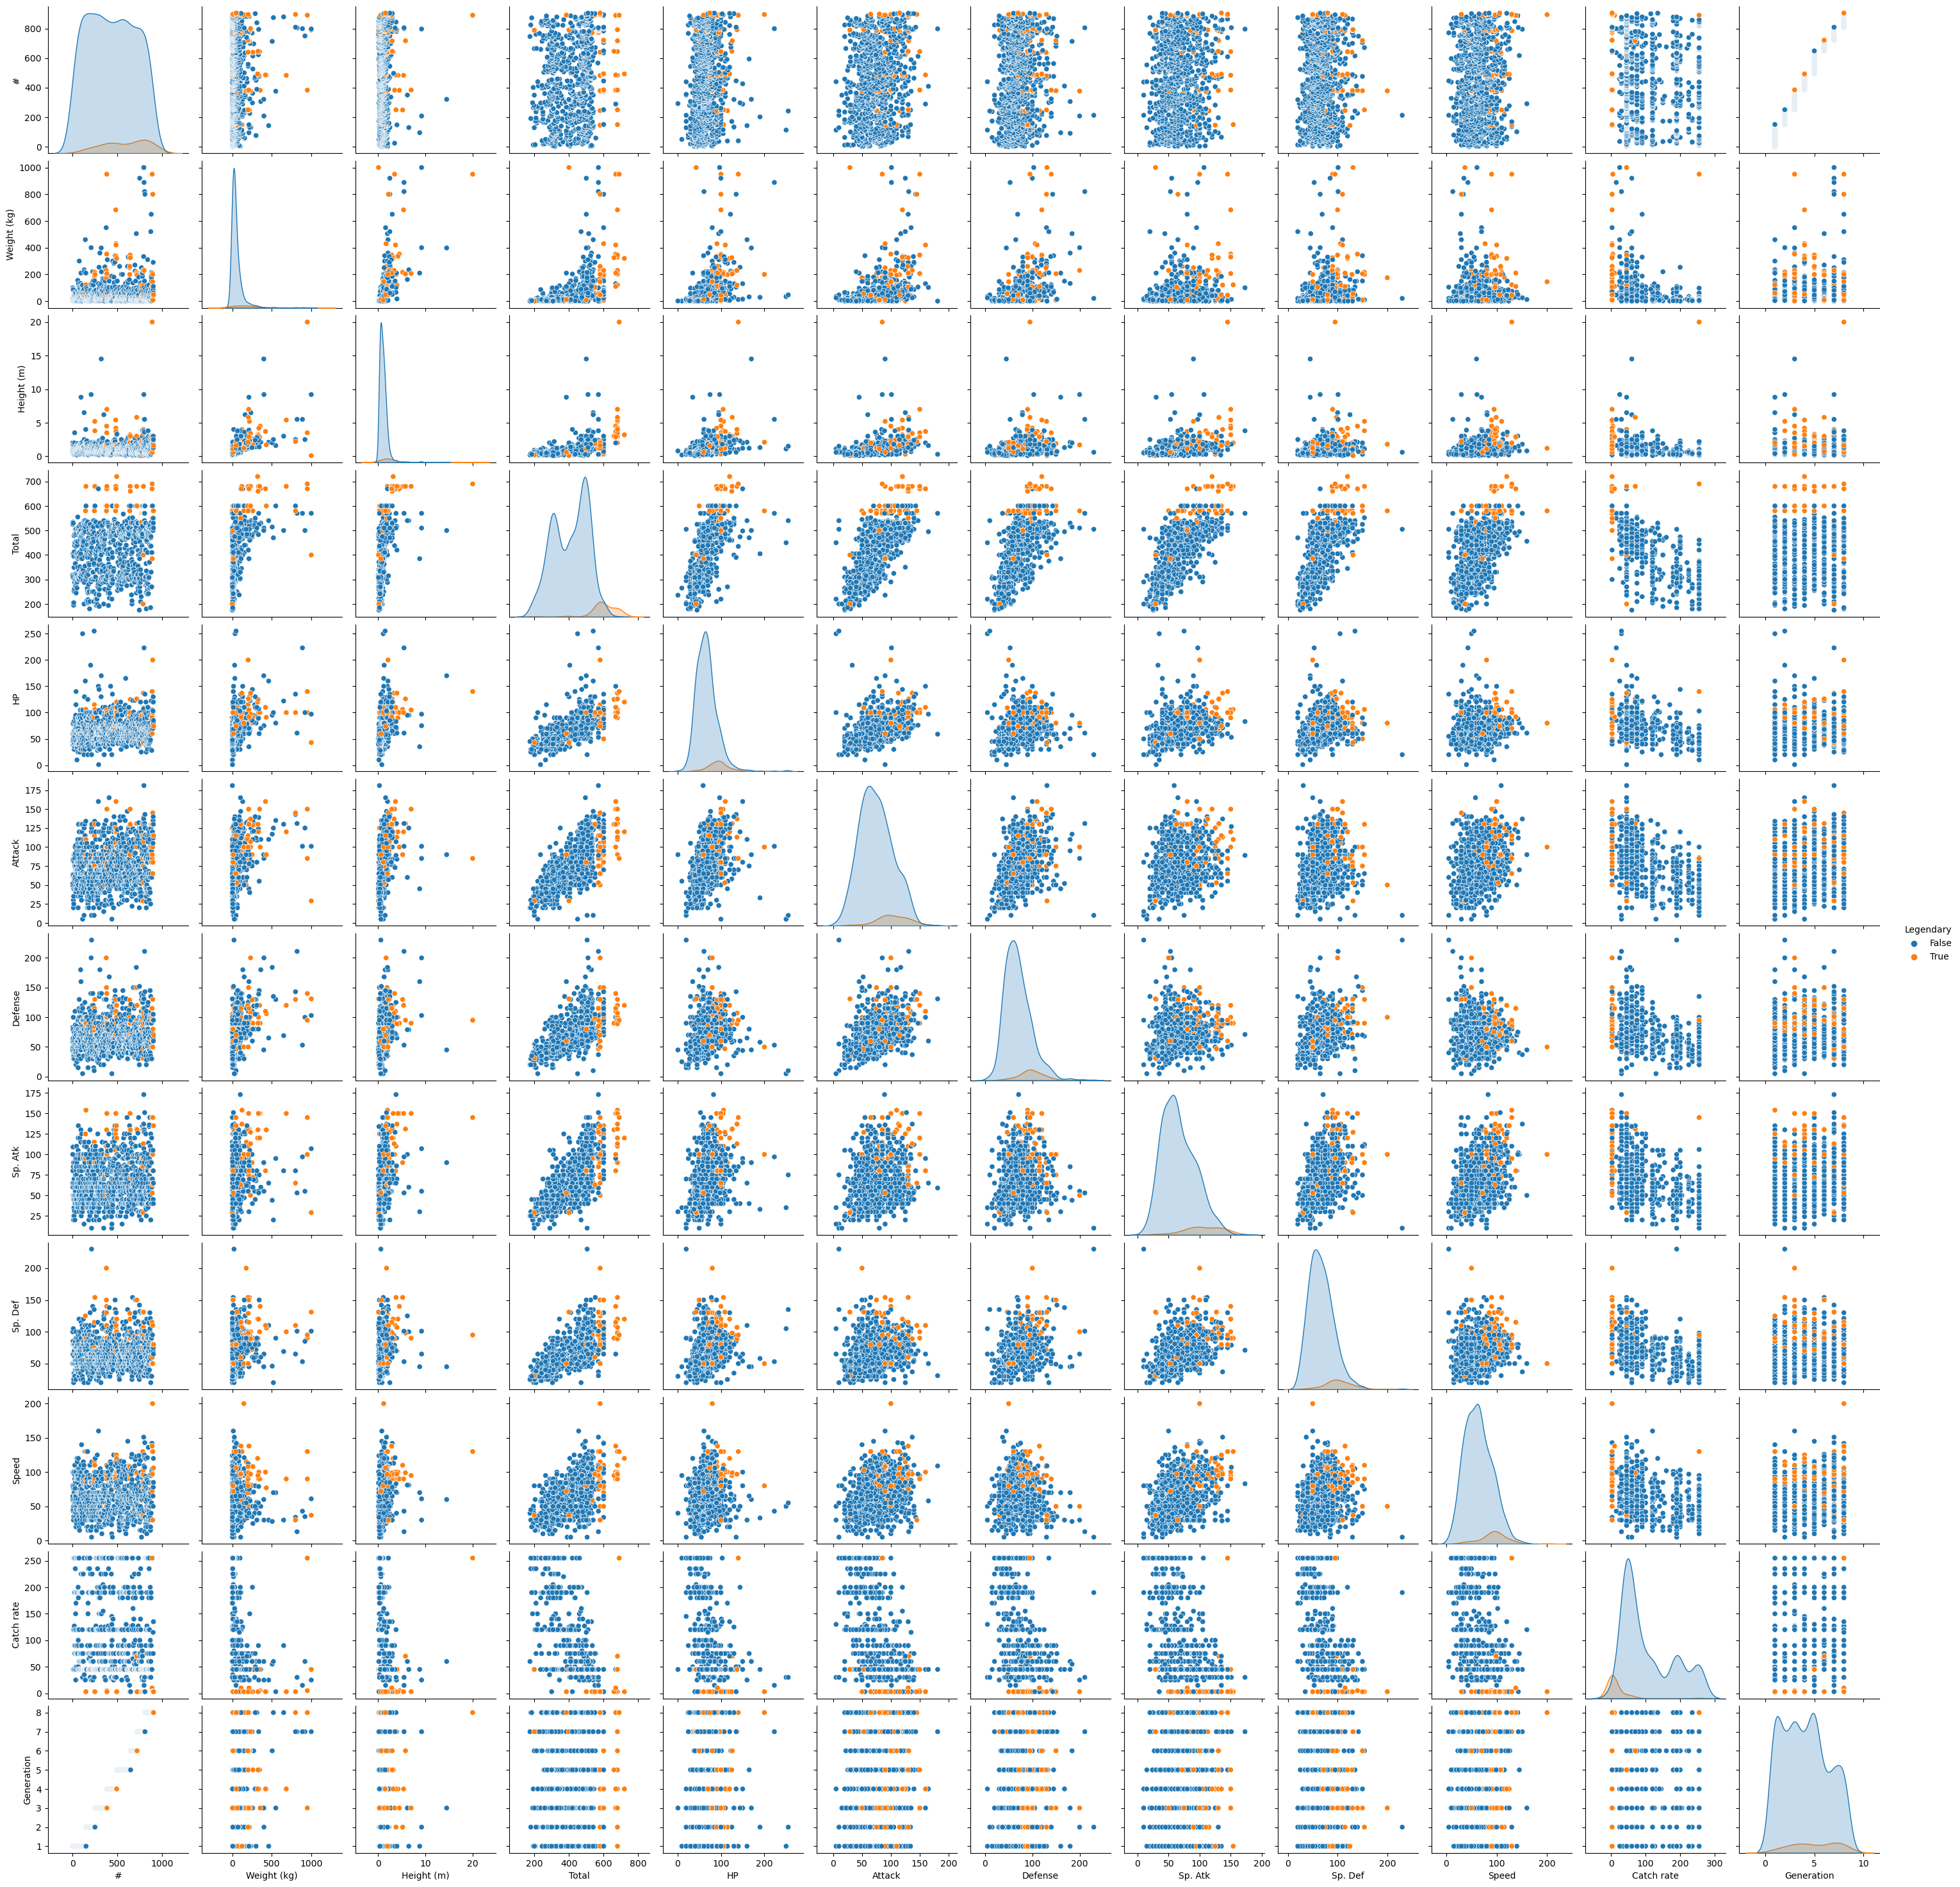

In [36]:
sns.pairplot(data=pokedex, hue="Legendary")

In [47]:
correlation = pokedex.filter(["Weight (kg)", "Height (m)", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Catch rate", "Generation", "Legendary"]).corr()
correlation

Weight (kg)  Height (m)     Total        HP    Attack   Defense  \
Weight (kg)     1.000000    0.637398  0.453902  0.427799  0.400303  0.447119   
Height (m)      0.637398    1.000000  0.513551  0.454605  0.384554  0.340862   
Total           0.453902    0.513551  1.000000  0.657598  0.719903  0.617534   
HP              0.427799    0.454605  0.657598  1.000000  0.469063  0.256258   
Attack          0.400303    0.384554  0.719903  0.469063  1.000000  0.467722   
Defense         0.447119    0.340862  0.617534  0.256258  0.467722  1.000000   
Sp. Atk         0.209983    0.345280  0.708846  0.374501  0.310222  0.197142   
Sp. Def         0.273079    0.284398  0.693588  0.354550  0.217699  0.500057   
Speed           0.025487    0.212693  0.534151  0.175546  0.331354 -0.021803   
Catch rate     -0.287517   -0.295156 -0.720280 -0.468273 -0.516873 -0.440830   
Generation      0.103278    0.037612  0.117239  0.082732  0.140019  0.081525   
Legendary       0.332068    0.294380  0.437055  0.265488  0.245538  0.250599   

              Sp. Atk   Sp. Def     Speed  Catch rate  Generation  Legendary  
Weight (kg)  0.209983  0.273079  0.025487   -0.287517    0.103278   0.332068  
Height (m)   0.345280  0.284398  0.212693   -0.295156    0.037612   0.294380  
Total        0.708846  0.693588  0.534151   -0.720280    0.117239   0.437055  
HP           0.374501  0.354550  0.175546   -0.468273    0.082732   0.265488  
Attack       0.310222  0.217699  0.331354   -0.516873    0.140019   0.245538  
Defense      0.197142  0.500057 -0.021803   -0.440830    0.081525   0.250599  
Sp. Atk      1.000000  0.490267  0.414850   -0.520249    0.082782   0.346664  
Sp. Def      0.490267  1.000000  0.195265   -0.493696    0.051615   0.336043  
Speed        0.414850  0.195265  1.000000   -0.391241    0.017987   0.277391  
Catch rate  -0.520249 -0.493696 -0.391241    1.000000   -0.052548  -0.300734  
Generation   0.082782  0.051615  0.017987   -0.052548    1.000000   0.106549  
Legendary    0.346664  0.336043  0.277391   -0.300734    0.106549   1.000000

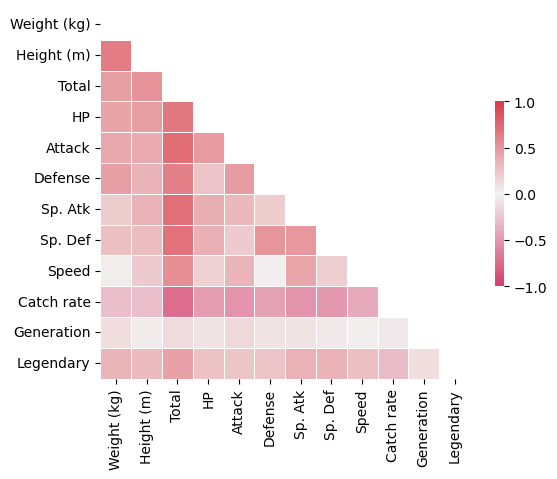

In [49]:
mask = np.triu(np.ones_like(correlation, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(correlation,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

<AxesSubplot:>

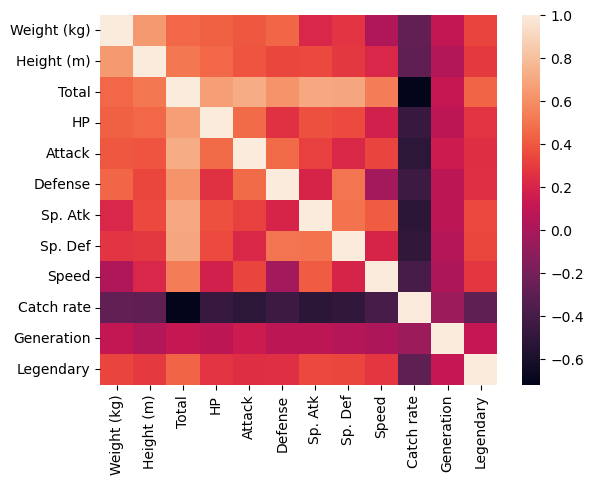

In [46]:
corr_df=pokedex.corr()
heatmap_df=corr_df.drop(['#']).drop(['#'],axis=1)
sns.heatmap(heatmap_df)